In [74]:
import importlib
import xarray as xr
import numpy as np
import sys

import matplotlib.pyplot as plt

from CASutils import mapplot_utils as maps
from CASutils import readdata_utils as read
from CASutils import calendar_utils as cal
from CASutils import colorbar_utils as cbars
from CASutils import shapefile_utils as shp

from math import nan

importlib.reload(maps)
importlib.reload(read)
importlib.reload(cbars)

<module 'CASutils.colorbar_utils' from '/home/islas/python/CASanalysis/CASutils/colorbar_utils.py'>

In [122]:
plotpath="/project/cas/islas/python_plots/snowpaper/FIGURES/"

In [4]:
era5ps = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/era5_ps/PS_ERA5_1979_2014_DJF.nc")
era5ps = era5ps.ps
era5ps = era5ps/100.
era5ps = era5ps.drop('season')

In [116]:
datera5 = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/flux_trefht_gradients/gradients_ERA5.nc")
datclm5 = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/flux_trefht_gradients/gradients_Isla_CAM6_CLM5_002.nc")
datsnowd = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/flux_trefht_gradients/gradients_CAM6_CLM5_snowdensity_002.nc")

datera5_comp = xr.open_dataset("/project/cas/islas/python_savs/snowpaper/DATA_SORT/trefhtptile_composites/pos_neg_extremes/ERA5_minmax_trefhtptilecomposite.nc")
datclm5_comp = xr.open_dataset(
    "/project/cas/islas/python_savs/snowpaper/DATA_SORT/trefhtptile_composites/pos_neg_extremes/Isla_CAM6_CLM5_002_minmax_trefhtptilecomposite.nc")
datsnowd_comp = xr.open_dataset(
    "/project/cas/islas/python_savs/snowpaper/DATA_SORT/trefhtptile_composites/pos_neg_extremes/CAM6_CLM5_snowdensity_002_minmax_trefhtptilecomposite.nc")

In [86]:
print(landfrac)

<xarray.DataArray 'LANDFRAC' (lat: 192, lon: 288)>
array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)
Coordinates:
  * lat      (lat) float64 -90.0 -89.06 -88.12 -87.17 ... 87.17 88.12 89.06 90.0
  * lon      (lon) float64 0.0 1.25 2.5 3.75 5.0 ... 355.0 356.2 357.5 358.8
    time     object 1850-02-01 00:00:00
Attributes:
    units:         fraction
    long_name:     Fraction of sfc area covered by land
    cell_methods:  time: mean


In [102]:
### greenland mask
shpfile="/project/cas/islas/shapefiles/greenland/gadm36_GRL_0.shp"
maskgreenland = shp.maskgen(shpfile, era5ps, ['Greenland'])

landfrac = xr.open_dataset('/project/cas/islas/cesmle/fx/landfraclens.nc')
landfrac = landfrac.LANDFRAC.isel(time=0)

path="/project/cas02/islas/CLM5_CLM4/raw/Isla_CAM6_CLM5_002/mon/lnd/"
fsno_clm5 = read.read_sfc_cesm(path+"FSNO_f.e21.FHIST.f09_f09.cesm2_cam6_clm5.002.1979-01_2014-12.nc","1979-01","2014-12")
fsno_clm5_djf = cal.season_mean(fsno_clm5,"FSNO",season="DJF")

path="/project/cas02/islas/CLM5_CLM4/raw/CAM6_CLM5_snowdensity_002/mon/lnd/"
fsno_snowd = read.read_sfc_cesm(path+"FSNO_f.e21.FHIST_BGC.f09_f09.cesm2_cam6_clm5_snowdensity.002.1979-01_2014-12.nc","1979-01","2014-12")
fsno_snowd_djf = cal.season_mean(fsno_snowd,"FSNO", season="DJF")

maskclm5 = np.empty([landfrac.lat.size, landfrac.lon.size])
maskclm5[ (fsno_clm5_djf > 0.5)] = 1

maskclm5inverse = np.where( (maskclm5 == 1) |  (landfrac < 0.5), nan, 1)

masksnowd = np.empty([landfrac.lat.size, landfrac.lon.size])
masksnowd[ fsno_snowd_djf > 0.5] = 1

psmask = np.zeros([landfrac.lat.size, landfrac.lon.size])
psmask[:,:] = nan
psmask[ era5ps <= 900] = 1

masking Greenland


/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))
/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/dask/array/numpy_compat.py:41: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)
/project/cas/islas/miniconda3/envs/ecpaperenv/lib/python3.6/site-packages/dask/core.py:121: RuntimeWarning: invalid value encountered in greater
  return func(*(_execute_task(a, cache) for a in args))


In [117]:
datera5 = datera5*np.array(landfrac)*maskclm5
datclm5 = datclm5*np.array(landfrac)*maskclm5
datsnowd = datsnowd*np.array(landfrac)*maskclm5

datera5_unmasked = datera5_comp*np.array(landfrac)
datclm5_unmasked = datclm5_comp*np.array(landfrac)
datsnowd_unmasked = datsnowd_comp*np.array(landfrac)

datera5_comp = datera5_comp*np.array(landfrac)*maskclm5
datclm5_comp = datclm5_comp*np.array(landfrac)*maskclm5
datsnowd_comp = datsnowd_comp*np.array(landfrac)*maskclm5

In [118]:
maxnet_era5 = -1.*datera5_comp.maxfsns - datera5_comp.maxflns - datera5_comp.maxshflx - datera5_comp.maxlhflx
minnet_era5 = -1.*datera5_comp.minfsns - datera5_comp.minflns - datera5_comp.minshflx - datera5_comp.minlhflx

maxnet_clm5 = -1.*datclm5_comp.maxfsns + datclm5_comp.maxflns + datclm5_comp.maxshflx + datclm5_comp.maxlhflx
minnet_clm5 = -1.*datclm5_comp.minfsns + datclm5_comp.minflns + datclm5_comp.minshflx + datclm5_comp.minlhflx

maxnet_snowd = -1.*datsnowd_comp.maxfsns + datsnowd_comp.maxflns + datsnowd_comp.maxshflx + datsnowd_comp.maxlhflx
minnet_snowd = -1.*datsnowd_comp.minfsns + datsnowd_comp.minflns + datsnowd_comp.minshflx + datsnowd_comp.minlhflx

maxnet_era5_unmasked = -1.*datera5_unmasked.maxfsns - datera5_unmasked.maxflns - datera5_unmasked.maxshflx - datera5_unmasked.maxlhflx
minnet_era5_unmasked = -1.*datera5_unmasked.minfsns - datera5_unmasked.minflns - datera5_unmasked.minshflx - datera5_unmasked.minlhflx

maxnet_clm5_unmasked = -1.*datclm5_unmasked.maxfsns + datclm5_unmasked.maxflns + datclm5_unmasked.maxshflx + datclm5_unmasked.maxlhflx
minnet_clm5_unmasked = -1.*datclm5_unmasked.minfsns + datclm5_unmasked.minflns + datclm5_unmasked.minshflx + datclm5_unmasked.minlhflx

maxnet_snowd_unmasked = -1.*datsnowd_unmasked.maxfsns + datsnowd_unmasked.maxflns + datsnowd_unmasked.maxshflx + datsnowd_unmasked.maxlhflx
minnet_snowd_unmasked = -1.*datsnowd_unmasked.minfsns + datsnowd_unmasked.minflns + datsnowd_unmasked.minshflx + datsnowd_unmasked.minlhflx



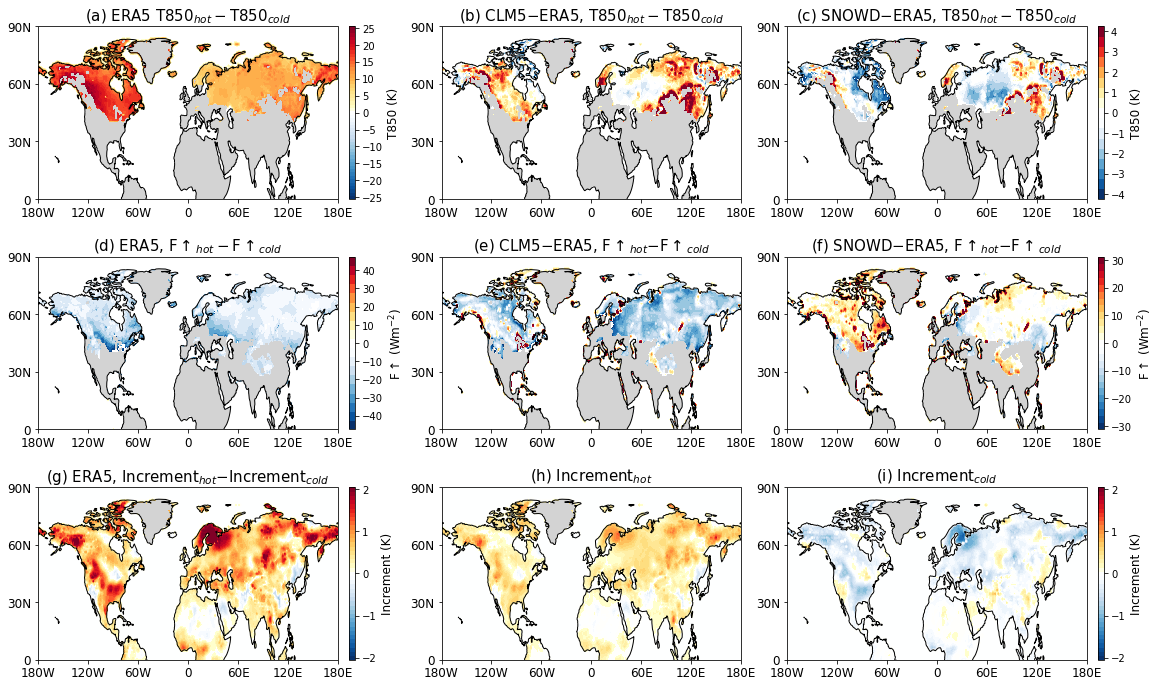

In [124]:
fig = plt.figure(figsize=(16,16))

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, datera5_comp.maxt850 - datera5_comp.mint850, datera5_comp.lon, datera5_comp.lat,
                                               1,-25,25,'(a) ERA5 T850$_{hot}-$T850$_{cold}$',0.05, 0.31,0.8,0.95)
ax.contourf(datera5_comp.lon, datera5_comp.lat, psmask, level=1, colors='lightgray')
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskgreenland, level=1, colors='lightgray')
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskclm5inverse, level=1, colors='lightgray')

ax = cbars.plotcolorbar(fig, 1,-25,25,'T850 (K)',0.32,0.325, 0.8,0.95, orient='vertical', fsize=10,
                        ticks=[-25,-20,-15,-10,-5,0,5,10,15,20,25])

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, (datclm5_comp.maxt850-datclm5_comp.mint850) - (datera5_comp.maxt850 - datera5_comp.mint850),
                                                datera5_comp.lon, datera5_comp.lat,0.5,-4,4,'(b) CLM5$-$ERA5, T850$_{hot}-$T850$_{cold}$',0.4,0.66,0.8,0.95)
ax.contourf(datera5_comp.lon, datera5_comp.lat, psmask, level=1, colors='lightgray')
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskgreenland, level=1, colors='lightgray')
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskclm5inverse, level=1, colors='lightgray')

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, (datsnowd_comp.maxt850 - datsnowd_comp.mint850) - (datera5_comp.maxt850 - datera5_comp.mint850),
                                               datera5_comp.lon, datera5_comp.lat, 0.5,-4,4,'(c) SNOWD$-$ERA5, T850$_{hot}-$T850$_{cold}$',0.7,0.96,0.8,0.95)
ax.contourf(datera5_comp.lon, datera5_comp.lat, psmask, level=1, colors='lightgray')
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskgreenland, level=1, colors='lightgray')
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskclm5inverse, level=1, colors='lightgray')

ax = cbars.plotcolorbar(fig, 0.5,-4,4,'T850 (K)',0.97,0.975,0.8,0.95, orient='vertical', fsize=10,
                       ticks=[-4,-3,-2,-1,0,1,2,3,4])

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, maxnet_era5_unmasked - minnet_era5_unmasked, datera5_comp.lon, datera5_comp.lat, 5,-45,45,
                                                '(d) ERA5, F$\\uparrow$$_{hot}-$F$\\uparrow$$_{cold}$',
                                               0.05,0.31,0.6,0.75)
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskgreenland, level=1, colors='lightgray')
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskclm5inverse, level=1, colors='lightgray')

ax = cbars.plotcolorbar(fig, 5,-45,45,'F$\\uparrow$ (Wm$^{-2}$)',0.32,0.325, 0.6, 0.75, 
                       ticks=[-40,-30,-20,-10,0,10,20,30,40], orient='vertical', fsize=10)

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, (maxnet_clm5_unmasked - minnet_clm5_unmasked) - (maxnet_era5_unmasked-minnet_era5_unmasked), datera5_comp.lon, datera5_comp.lat,
                                               2.5,-30,30,'(e) CLM5$-$ERA5, F$\\uparrow$$_{hot}$$-$F$\\uparrow$$_{cold}$',0.4,0.66,0.6,0.75)
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskgreenland, level=1, colors='lightgray')
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskclm5inverse, level=1, colors='lightgray')

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, (maxnet_snowd_unmasked - minnet_snowd_unmasked) - (maxnet_era5_unmasked-minnet_era5_unmasked), datera5_comp.lon, datera5_comp.lat,
                                               2.5,-30,30,'(f) SNOWD$-$ERA5, F$\\uparrow$$_{hot}$$-$F$\\uparrow$$_{cold}$',0.7, 0.96, 0.6, 0.75)
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskgreenland, level=1, colors='lightgray')
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskclm5inverse, level=1, colors='lightgray')

ax = cbars.plotcolorbar(fig, 2.5, -30, 30, 'F$\\uparrow$ (Wm$^{-2}$)', 0.97,0.975,0.6,0.75,
                       ticks=[-30,-20,-10,0,10,20,30], orient='vertical', fsize=10)

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, datera5_unmasked.maxincrement - datera5_unmasked.minincrement, datera5_comp.lon, datera5_comp.lat,
                                               0.1,-2,2,'(g) ERA5, Increment$_{hot}$$-$Increment$_{cold}$', 0.05,0.31,0.4,0.55)
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskgreenland, level=1, colors='lightgray')


ax = cbars.plotcolorbar(fig, 0.1, -2, 2, 'Increment (K)', 0.32,0.325,0.4,0.55,
                       ticks=[-2,-1,0,1,2], orient='vertical', fsize=10)

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, datera5_unmasked.maxincrement, datera5_comp.lon, datera5_comp.lat,
                                               0.1,-2,2,'(h) Increment$_{hot}$ ',0.4,0.66,0.4,0.55)
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskgreenland, level=1, colors='lightgray')


ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, datera5_unmasked.minincrement, datera5_comp.lon, datera5_comp.lat,
                                               0.1,-2,2,'(i) Increment$_{cold}$',0.7,0.96,0.4,0.55)
ax.contourf(maskgreenland.lon, maskgreenland.lat, maskgreenland, level=1, colors='lightgray')


ax = cbars.plotcolorbar(fig, 0.1, -2, 2, 'Increment (K)',0.97,0.975, 0.4,0.55,
                       ticks=[-2,-1,0,1,2], orient='vertical', fsize=10)

fig.savefig(plotpath+'obsfigure.png', bbox_inches='tight', facecolor='white')


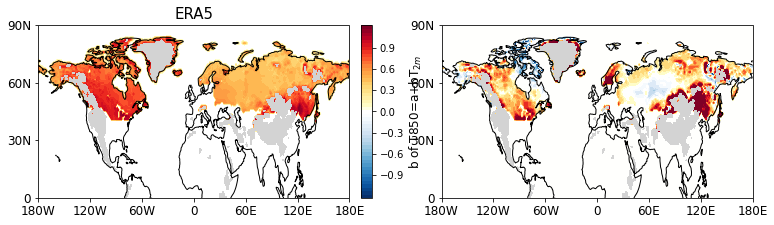

In [12]:
fig = plt.figure(figsize=(16,16))

ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, datera5.bt850, datera5.lon, datera5.lat,
                                                0.05,-1.2,1.2,'ERA5',0.05,0.32,0.8,0.95)
ax.contourf(datera5.lon, datera5.lat, psmask, levels=1, colors='lightgray')

ax = cbars.plotcolorbar(fig, 0.05,-1.2,1.2,'b of T850=a+bT$_{2m}$', 0.33,0.34,0.8,0.95, orient='vertical', fsize=10, 
                        ticks=[-0.9,-0.6,-0.3,0,0.3,0.6,0.9])


ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, datclm5.bt850 - datera5.bt850, datera5.lon, datera5.lat,
                                               0.02,-0.2,0.2,' ',0.4,0.67,0.8,0.95)
ax.contourf(datera5.lon, datera5.lat, psmask, levels=1, colors='lightgray')


#ax = maps.contourmap_bothcontinents_fill_nh_pos(fig, datsnowd.bt850 - datera5.bt850, datera5.lon, datera5.lat,
#                                               0.02,-0.2,0.2,' ',0.65,0.92,0.8,0.95)#

#ax.contourf(datera5.lon, datera5.lat, psmask, levels=1, colors='lightgray')

In [47]:
basepath="/project/cas/islas/python_savs/snowpaper/DATA_SORT/flux_trefht_gradients/"
clm5 = xr.open_dataset(basepath+'gradients_Isla_CAM6_CLM5_002.nc')
snowd = xr.open_dataset(basepath+'gradients_CAM6_CLM5_snowdensity_002.nc')
era5 = xr.open_dataset(basepath+'gradients_ERA5.nc')

In [48]:
clm5 = clm5*np.array(landfrac)*maskclm5
snowd = snowd*np.array(landfrac)*masksnowd
era5 = era5*np.array(landfrac)*maskclm5

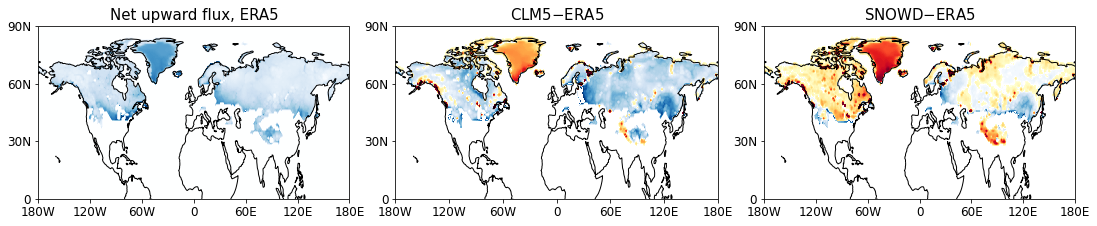

In [51]:
fig = plt.figure(figsize=(16,16))

ax1 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(era5.bsumflux), np.array(era5.lon), np.array(era5.lat),0.02,-3.,3,
                                                 'Net upward flux, ERA5',0.05,0.32,0.8,0.95)

ax1 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(clm5.bsumflux) - np.array(era5.bsumflux), np.array(era5.lon), np.array(era5.lat),
                                                0.02,-2,2,'CLM5$-$ERA5',0.36,0.64,0.8,0.95)

ax1 = maps.contourmap_bothcontinents_fill_nh_pos(fig, np.array(snowd.bsumflux) - np.array(era5.bsumflux), np.array(era5.lon), np.array(era5.lat),
                                                0.02,-2,2,'SNOWD$-$ERA5',0.68,0.95,0.8,0.95)


In [26]:
print(datera5.bt850.sel(lon=255, lat=60,  method='nearest'))

<xarray.DataArray 'bt850' ()>
array(0.80499602)
Coordinates:
    lat      float64 59.84
    lon      float64 255.0
